# Проект для интернет магазина по продаже компьютерных игр

Наш проект направлен на решение бизнес-задачи по увеличению продаж компьютерных игр в интернет-магазине. Для достижения этой цели необходимо выявить ключевые факторы, влияющие на успешность игры, и разработать эффективную рекламную кампанию для продвижения потенциально популярного продукта.

В нашем распоряжении имеются данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Наша задача состоит в том, чтобы проанализировать эти данные, найти корреляции между различными параметрами и успешностью игры, а также определить наиболее перспективные жанры и платформы для продвижения.

План работы включает в себя следующие этапы:

1. Предобработка данных.
2. Исследовательский нализ данных.
3. Статистический анализ данных.
4. Погнозирование и разработка рекомендаций.

В результате выполнения проекта мы планируем получить надежные рекомендации по продвижению компьютерных игр, которые помогут увеличить продажи и улучшить позиции нашего интернет-магазина на рынке. Кроме того, мы сможем спланировать эффективную рекламную кампанию, нацеленную на потенциально популярный продукт, что позволит максимально эффективно использовать рекламный бюджет.

## Шаг 1. Импорт библиотек, открытие файла с данными изучение информации

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Создаем датасет pandas
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Вывод заголовка таблицы
data.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Смотрим инфо датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Датасет содержит 11 столбцов и 16715 строк. Данные содержат пропуски. Таким столбцам как год выпуска и рейтинг ползователей необходимо преобразовать тип данных. Название столбцов необходимо привести к нижнему регистру и типу написания snake case**


## Шаг 2. Подготовка данных

### Удаление пропусков

In [5]:
# Заменяем названия столбцов и приводим их к нижнему регистру
data = data.rename(columns=str.lower)

Делаем замену сразу, чтобы при дальнейших обращениях к данным не было путаницы

In [6]:
# Cоздаем отчет о пропущенных значениях в данных
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


In [7]:
# Выводим строки с пустыми 'name'
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# Строки с пустыми данными в 'name' и 'genre' одно и тоже, удаляем их
data = data.dropna(subset=['name'])

In [9]:
# Смотрим количество пропусков в датасете
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Для восстановления пустых строк в столбце года выпуска игры можно попытаться вытащить год из названия игры

In [10]:
# Выводим строки в которых в названии игры содержится число в формате ЧЧЧЧ или (ЧЧЧЧ)
data[data['name'].str.contains(r'\b\d{4}\b|\(\d{4}\)')].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
206,Warzone 2100,PS,1999.0,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN
338,FIFA Soccer 2005,PS2,2004.0,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E
342,Star Wars Battlefront (2015),XOne,2015.0,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E


В некоторых играх число содержащееся в названии обозначает вовсе не дату выхода. Для некоторых игр год указаный в названии совпадает с годом выпуска, для некоторых указан год следующий за текущим годом выхода. Плюс для разных платформ одна и та же игра выпускалась в разные периоды. Поэтому восстановить 269 строк становится затруднитеьно, поэтому удалим эти строки из датасета. Тем более, что это всего 1,6% данных. 

In [11]:
# Удаляем пустые строки с годом выпуска 
data = data.dropna(subset=['year_of_release'])

In [12]:
# Cоздаем отчет о пропущенных значениях в данных
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8461,0.51
rating,6676,0.41
user_score,6605,0.40
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


В столбце 'critic_score' отсутствуют данные, эо может быть связано с тем, что игра была выпущена недавно, или что она не привлекла достаточного внимания критиков. Поэтому заменяем NaN на -1

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [14]:
# Cоздаем отчет о пропущенных значениях в данных
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
rating,6676,0.41
user_score,6605,0.40
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00


Столбец 'user_score' имеет тип данных 'object' посмотрим его уникальные значения

In [15]:
# Вывод уникальных значений столбца 'user_score' 
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' значение 'tbd' указывает на то, что средняя оценка пользователей еще не была рассчитана, а пропуски могут означать, что для некоторых игр нет достаточного количества оценок от пользователей для вычисления средней оценки. Это может быть связано с тем, что игра была недавно выпущена или не привлекла достаточного внимания пользователей. Кроме того, пропуски могут возникнуть при выгрузке данных. По этим причинам заменяем NaN и 'tbd' на 0.

In [16]:
# Заменяем NaN и tbd на -1 
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').fillna(-1)

In [17]:
# Cоздаем отчет о пропущенных значениях в данных
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
rating,6676,0.41
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,0,0.00


Пропуски в столбце'rating' могли появится по тем же причинам, что в столбцах 'critic_score' и 'user_score'. Заменим пропуски в этом столце на 'unrated'

In [18]:
# Заменяем пропуски в столбце rating
data['rating'] = data['rating'].fillna('unrated')

In [19]:
# Cоздаем отчет о пропущенных значениях в данных
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
name,0,0.0
platform,0,0.0
year_of_release,0,0.0
genre,0,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0
other_sales,0,0.0
critic_score,0,0.0
user_score,0,0.0


### Преобразование типов

Для того, чтобы корректно проводить анализ данных, столбец 'year_of_release' необходимо преобразовать в тип данных int, а столбец 'user_score' - в тип данных float. Потому что года исчисляются в целых числах, рейтинг в дробных.

In [20]:
# Столбец с годом выпуска приводим к типу int
data['year_of_release'] = data['year_of_release'].astype(int)

In [21]:
# Столбец с годом выпуска приводим к типу float
data['user_score'] = data['user_score'].astype(float)

In [22]:
# Смотрим инфо датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработка дубликатов

Для проверки наличия явных дубликатов приведем строковые данные датасета к нижнему регистру.

In [23]:
column_names = ['name', 'platform', 'genre', 'rating']

# Перебираем названия столбцов и приводим их к нижнему регистру
for column in column_names:
    data[column] = data[column].str.lower()

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated


In [25]:
# Проверяем наличие явных дубликатов
data.duplicated().sum()

0

Явных дубликатов не выявлено. Проверим наличие дубликатов на основе столбцов 'name', 'platform', 'year_of_release'

In [26]:
# Выводим все дублирующиеся строки
display(data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


In [27]:
# Удалим строку с индексом 16230
data = data.query('name != "madden nfl 13" & eu_sales != 0.01')

### Добавление новых столбцов

In [28]:
# Добавляем столбец с суммарными продажами во всех регионах 
data['total_sales'] = data[{'na_sales', 'eu_sales', 'jp_sales', 'other_sales'}].sum(axis=1)

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated,31.38


**1. 1,6 % данных, которые проблематично восстановить были удалены из исходного датасета.**

**2. Столбцы year_of_release и user_score были приведены к типу данных int и float**

**3. Явных дубликатов в результате проверки не было выявлено.**

## Шаг 3. Исследовательский анализ данных

### Количество выпущеных игр в разные годы

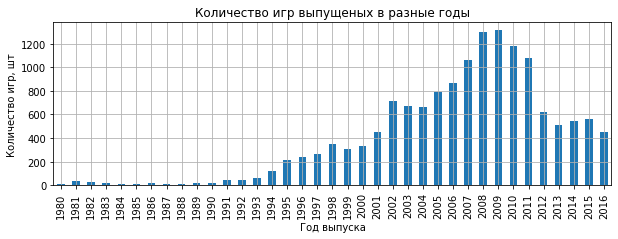

In [30]:
# Строим гистограмму количества выпущеных игр в разные годы
(
    data.
        groupby('year_of_release')['name'].count()
        .plot(kind='bar', figsize=(10,3))
)
plt.title('Количество игр выпущеных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, шт')
plt.grid()

Исходя из имеющихся данных можно сказать, что активное развитие игровой индустрии началось в начале 90-х и достигло своего пика по количеству выпущенных игр в 2008-2009 годах.

### Изменение продаж по платформам

In [31]:
# Группируем данные по столбцу с платформами и вычисляем суммарные продажи для каждой платформы
platform_sales = (data
                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales', ascending=False)
                 )

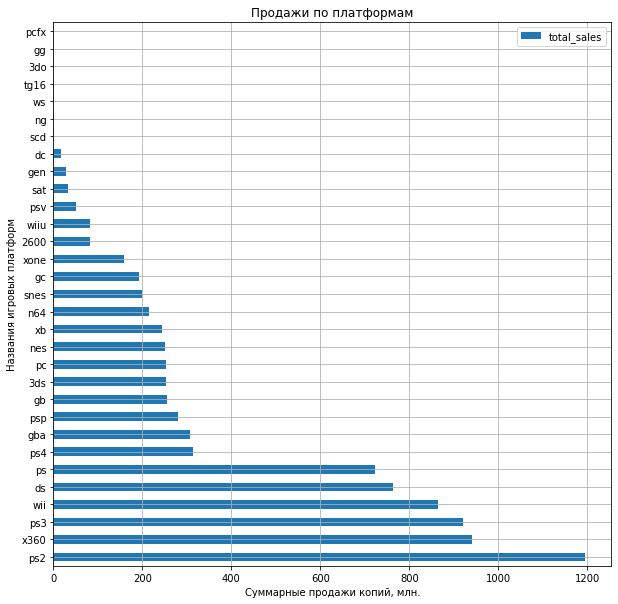

In [32]:
# Строим график зависимости сумарных продаж по платформам за весь известный период
platform_sales.plot(kind='barh', figsize=(10,10))
plt.title('Продажи по платформам')
plt.ylabel('Названия игровых платформ')
plt.xlabel('Суммарные продажи копий, млн.')
plt.grid()
plt.legend()
plt.show()

Наибольшее число проданных копий игр для платформ ps2, x360, ps3, wii, ds и ps. Продажи по этим платформам более чем в два раза отличаются от остальных платформ.

In [33]:
# Выбираем топ платформ по наибольшему числу продаж
top_platforms = platform_sales.query('total_sales > 500' )

In [34]:
top_platforms

,total_sales
platform,
ps2,1194.57
x360,941.14
ps3,920.18
wii,865.51
ds,763.86
ps,723.73


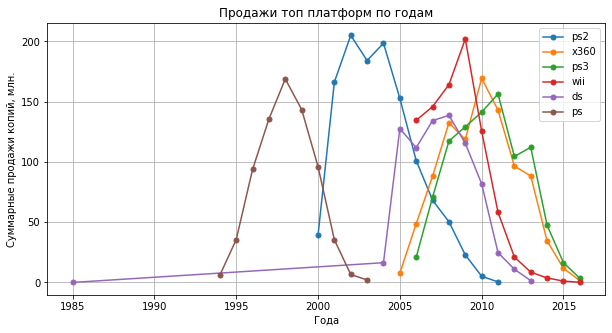

In [35]:
# Построение графика распределения суммарных продаж по годам для выбранных платформ
fig, ax = plt.subplots(figsize=(10, 5)) 
for platform in top_platforms.index:
    platform_data = data[data['platform'] == platform]
    platform_year_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    ax.plot(platform_year_sales.index, platform_year_sales.values, label=platform, marker='o', markersize=5) 

plt.title('Продажи топ платформ по годам')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи копий, млн.')
plt.grid()
plt.legend()
plt.show()

Платформа ds была выпущена в 2004 году, в связи с чем в 1985 не могла иметь продаж

In [36]:
# Выводим строки с играми для платформы 'ds' выпущеными в 1985 году
data.query('platform == "ds" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1.0,-1.0,unrated,0.02


Игра 'strongest tokyo university shogi ds' была переиздана для платформы ds в мае 2007 года.

In [37]:
# Меняем год выпуска игры на правильный
data.loc[data['name'] == 'strongest tokyo university shogi ds', 'year_of_release'] = 2007

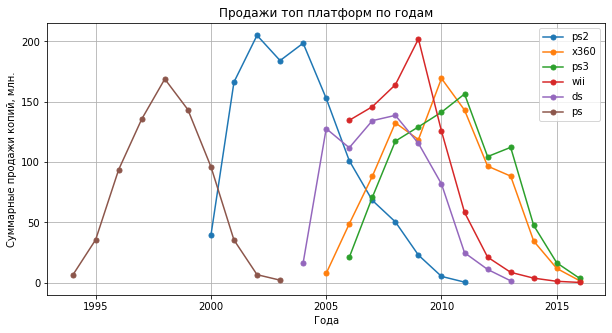

In [38]:
# Повторно строим график распределения суммарных продаж по годам для выбранных платформ
fig, ax = plt.subplots(figsize=(10, 5)) 
for platform in top_platforms.index:
    platform_data = data[data['platform'] == platform]
    platform_year_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    ax.plot(platform_year_sales.index, platform_year_sales.values, label=platform, marker='o', markersize=5) 

plt.title('Продажи топ платформ по годам')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи копий, млн.')
plt.grid()
plt.legend()
plt.show()

На представленном графике хорошо видно распределение продаж по годам для топ платформ. Можно заметить, что средний срок жизни каждой платформы ~ 8-10 лет. На примере линейки платформ PlayStation хорошо видна смена поколений платформ. Можно сказать что за характерный срок ~ 5-6 лет появляются новые игровые платформы. 

Для анализа и прогнозирования продаж в 2017 году мы будем использовать данные за последние три года. Данные взятые за такой период будут более актуальными и отражать текущие тенденции на рынке компьютерных игр. Если брать данные за более длительный период, то они могут быть устаревшими и не отражать текущие тренды и предпочтения потребителей.

### Выбор потенциально прибыльных платформ.

In [39]:
# Отфильтруем данные и возьмем в расчет последние 3 года
data_filtered = (data.loc[(data['year_of_release'] > 2013)])

In [40]:
data_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unrated,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unrated,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unrated,7.98


In [41]:
# Группируем данные по столбцу с платформами и вычисляем суммарные продажи для каждой платформы
platform_sales_of_year = data_filtered.groupby(['year_of_release', 'platform']).agg({
    'total_sales': 'sum'
}).reset_index()

In [42]:
platform_sales_of_year.head()

,year_of_release,platform,total_sales
0,2014,3ds,43.46
1,2014,pc,13.24
2,2014,ps3,47.44
3,2014,ps4,99.94
4,2014,psp,0.24


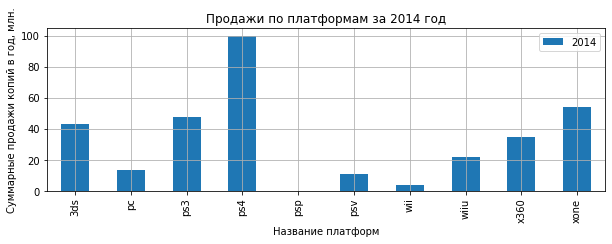

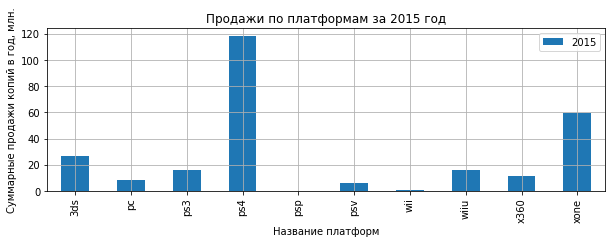

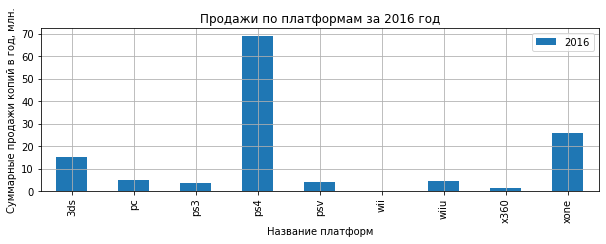

In [43]:
# Строим графики продаж по платформам за каждый год последних 3-х лет
for year in platform_sales_of_year['year_of_release'].unique():
    (
    platform_sales_of_year
        .query('year_of_release == @year')
        .groupby('platform')['total_sales'].sum()
        .plot(kind='bar', figsize=(10,3), label=year)
    )
    plt.title(f'Продажи по платформам за {year} год')
    plt.xlabel('Название платформ')
    plt.ylabel('Суммарные продажи копий в год, млн.')
    plt.grid()
    plt.legend()
    plt.show()

Можно сказать, что за последние 3 года лидерами продаж являются две платфоры ps4 и xone. Их будем иметь ввиду как потенциально прибыльные платформы. 
Стоит отметить, что общий тренд для всех платформ по суммарным продажам идет на спад от года к году.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

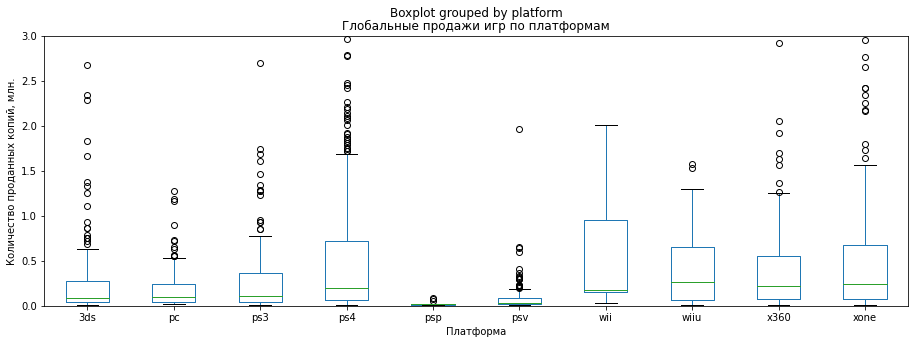

In [44]:
# Строим график "ящик с усами"
data_filtered.boxplot(column='total_sales', by='platform', figsize=(15, 5))

plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')
plt.ylim(0, 3)
plt.grid()
plt.show()

На графике глобальных продаж в разбивке по платформам хорошо видно, что медианное значение продаж по всем платформам менее 0,5 млн. копий. Однако среди выбросов находятся популярные игры, которые продались миллионными тиражами.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

In [45]:
# Фильтруем данные, оставляя только игры для 'ps4' выпущеные за последние 3 года [data_filtered['platform'] == 'ps4']
ps4_games = data_filtered.query('platform == "ps4" & critic_score >= 0 & user_score >= 0')

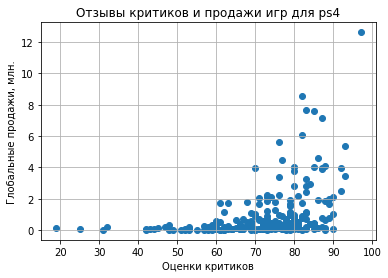

In [46]:
# Строим диаграмму рассеяния по отзывам критиков
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'])

plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы критиков и продажи игр для ps4')
plt.grid()
plt.show()

На диаграмме рассеяния видно, что между оценками критиков и продажами есть положительная корреляция, но она слабая. Большинство игр с высоким рейтингом имеют малые продажи.

In [47]:
# Считаем корреляцию
ps4_games[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.406151
total_sales,0.406151,1.000000


Значение корреляции между оценками критиков и продажами равняется 0,34. Это подтверждает наше наблюдение на диаграмме рассеяния: между оценками критиков и продажами есть положительная корреляция, но она не очень сильная.

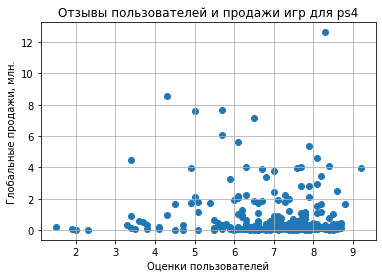

In [48]:
# Строим диаграмму рассеяния по отзывам пользователей
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'])

plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы пользователей и продажи игр для ps4')
plt.grid()
plt.show()

На диаграмме рассеяния видно, что между оценками пользователей и продажами также есть корреляция, но она еще слабее, чем между оценками критиков и продажами.

In [49]:
# Считаем корреляцию
ps4_games[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.040818
total_sales,-0.040818,1.000000


Значение корреляции между оценками пользователей и продажами равняется 0,11. Это подтверждает наше наблюдение на диаграмме рассеяния: между оценками пользователей и продажами есть положительная корреляция, но она еще слабее, чем между оценками критиков и продажами.

Для соотнесения выводов с продажами игр на других платформах, можно провести аналогичный анализ для нескольких популярных платформ и сравнить результаты.

In [50]:
# Фильтруем данные, оставляя только игры для xone выпущеные за последние 3 года
xone_games = data_filtered.query('platform == "xone" & critic_score >= 0 & user_score >= 0')

# Фильтруем данные, оставляя только игры для pc выпущеные за последние 3 года
pc_games = data_filtered.query('platform == "pc" & critic_score >= 0 & user_score >= 0')

# Фильтруем данные, оставляя только игры для 3ds выпущеные за последние 3 года
threeds_games = data_filtered.query('platform == "3ds" & critic_score >= 0 & user_score >= 0')


              critic_score  total_sales
critic_score      1.000000     0.405997
total_sales       0.405997     1.000000


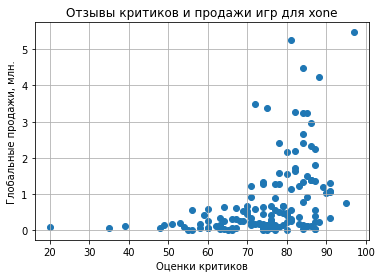

              critic_score  total_sales
critic_score      1.000000     0.160957
total_sales       0.160957     1.000000


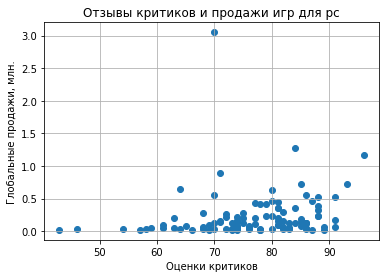

              critic_score  total_sales
critic_score      1.000000     0.275677
total_sales       0.275677     1.000000


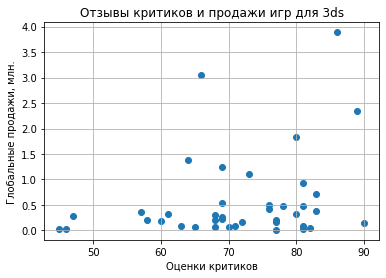

In [51]:
# Строим диаграмму рассеяния и считаем корреляцию для xone
plt.scatter(xone_games['critic_score'], xone_games['total_sales'])
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы критиков и продажи игр для xone')
plt.grid()
corr = xone_games[['critic_score', 'total_sales']].corr()
print(corr)
plt.show()

# Строим диаграмму рассеяния и считаем корреляцию для pc
plt.scatter(pc_games['critic_score'], pc_games['total_sales'])
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы критиков и продажи игр для pc')
plt.grid()
corr = pc_games[['critic_score', 'total_sales']].corr()
print(corr)
plt.show()

# Строим диаграмму рассеяния и считаем корреляцию для 3ds
plt.scatter(threeds_games['critic_score'], threeds_games['total_sales'])
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы критиков и продажи игр для 3ds')
plt.grid()
corr = threeds_games[['critic_score', 'total_sales']].corr()
print(corr)
plt.show()

Из полученных данных видно, что между оценками критиков и продажами есть положительная корреляция для всех трех платформ, но степень корреляции слабая.

             user_score  total_sales
user_score      1.00000     -0.09169
total_sales    -0.09169      1.00000


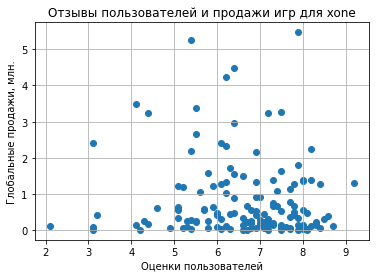

             user_score  total_sales
user_score     1.000000    -0.068515
total_sales   -0.068515     1.000000


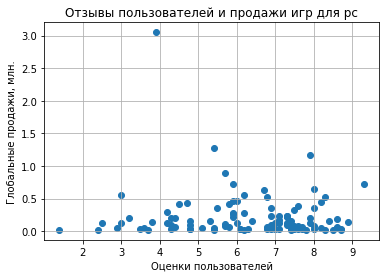

             user_score  total_sales
user_score     1.000000     0.264762
total_sales    0.264762     1.000000


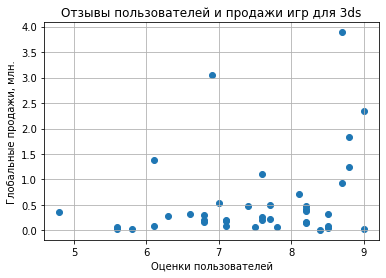

In [52]:
# Строим диаграмму рассеяния и считаем корреляцию для xone
plt.scatter(xone_games['user_score'], xone_games['total_sales'])
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы пользователей и продажи игр для xone')
plt.grid()
corr = xone_games[['user_score', 'total_sales']].corr()
print(corr)
plt.show()

# Строим диаграмму рассеяния и считаем корреляцию для pc
plt.scatter(pc_games['user_score'], pc_games['total_sales'])
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы пользователей и продажи игр для pc')
plt.grid()
corr = pc_games[['user_score', 'total_sales']].corr()
print(corr)
plt.show()

# Строим диаграмму рассеяния и считаем корреляцию для 3ds
plt.scatter(threeds_games['user_score'], threeds_games['total_sales'])
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи, млн.')
plt.title('Отзывы пользователей и продажи игр для 3ds')
plt.grid()
corr = threeds_games[['user_score', 'total_sales']].corr()
print(corr)
plt.show()

Корреляция между оценками пользователей и продажами для платформ xone, pc и 3d слабая.

На основании полученных результатов по всем платформам можно сделать вывод, что в целом отзывы критиков слабо влияют на продажи игр на разных платформах, а отзывы пользователей на продажи практически не влияют. 

### Распределение игр по жанрам

In [53]:
# Считаем количество игр и суммарные продажи по жанрам, которые были выпущены за последние 3 года
games_by_genre = (data_filtered
    .groupby('genre').agg({'name' : 'count','total_sales' : 'median'})
    .rename(columns={
    'name' : 'Кол-во игр',
    'total_sales' : 'Медиана продаж'})
    .sort_values(by='Медиана продаж', ascending=False)
        
)

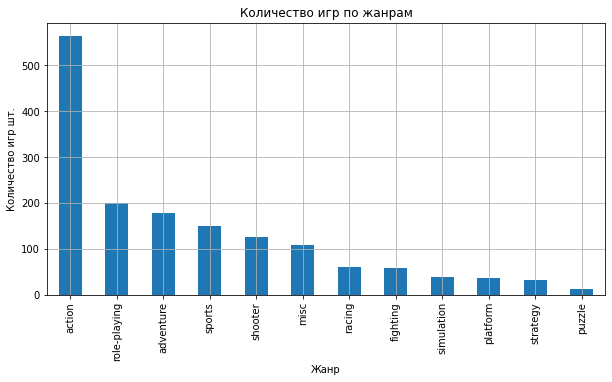

In [54]:
# Строим график зависимости количества игр по жанрам
games_by_genre['Кол-во игр'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр шт.')
plt.grid()
plt.show()

Наибольшее число игр выпущено в жанре action, наименьшее в жанре puzzle

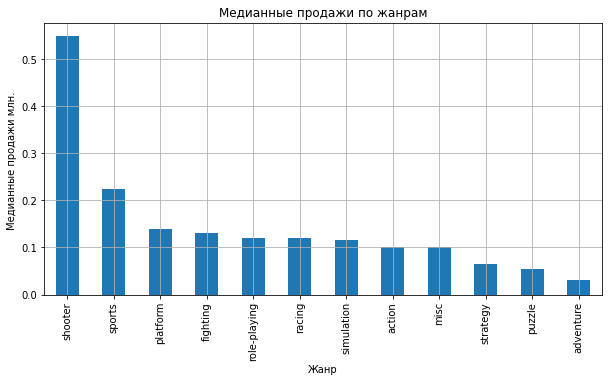

In [55]:
# Строим график зависимости медианных продаж по жанрам за последние 3 года
games_by_genre['Медиана продаж'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи млн. ')
plt.grid()
plt.show()

Жанры shooter и sports имеет наибольшее количество игр с высокими продажами, а жанры puzzle и adventure - наименьшее, для остальных игр этот показатель приблизительно на одном уровне.

Исходя из графиков можно сделать вывод, что наиболее прибыльный жанр это shooter, а жанры puzzle и adventure- наименее прибыльные.  Больше всего игр выпускается в жанре action, но медианный уровень продаж этого жанра на равне с большинством выпускаемых жанров.

**На основании полученых результатов можно сделать следующие выводы:**

 - Активный выпуск игр начался в 90-х, к 2010 -му году достиг своего пика, далее пошел на спад и в последние 5 лет стабилизировался.
 - Наибольшее число проданных копий игр за все время было осуществлено для платформ ps2, x360, ps3, wii, ds и ps. Продажи по этим платформам более чем в два раза отличаются от остальных платформ.
 - За последние 5 лет лидерами продаж являются две платфоры ps4 и xone. Общий тренд для всех платформ по суммарным продажам идет на спад от года к году.
 - Степень влияния отзывы критиков на продажи игр на разных платформах слабая, отзывы пользователей практически не влияют на продажи.
 - Жанры shooter и sports являются самым прибыльными, а жанры puzzle и adventure - наименее прибыльными.

## Шаг 4. Составляем портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

### Самые популярные платформы (топ-5)

In [56]:
# Группируем данные по суммарным продажам игр на каждой платформе в регионах NA, EU и JP
top_platform_in_region = (data_filtered
                       .pivot_table(index='platform', values={'na_sales', 'eu_sales', 'jp_sales'}, aggfunc='sum')
                       .rename(columns={'na_sales' : 'NA', 'eu_sales' : 'EU', 'jp_sales' : 'JP'})
                      )

In [57]:
top_platform_in_region

,EU,JP,NA
platform,,,
3ds,15.98,43.79,22.03
pc,17.71,0.00,7.21
ps3,25.40,11.14,21.54
ps4,129.88,14.73,98.48
psp,0.00,0.36,0.00
psv,3.34,13.97,2.13
wii,2.57,0.00,2.08
wiiu,13.07,7.31,19.23
x360,15.42,0.08,27.99


In [58]:
regions = list(top_platform_in_region.columns)

In [59]:
regions

['EU', 'JP', 'NA']

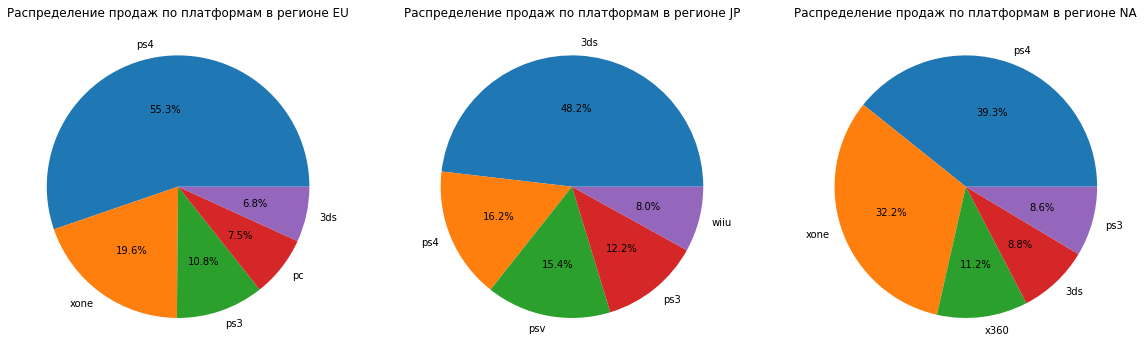

In [60]:
# Строим диаграммы соотношения топ-5 платформ для пользователей по регионам
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
for region in regions:
    top_platforms = top_platform_in_region[region].sort_values(ascending=False).head(5)
    axs[regions.index(region)].pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%')
    axs[regions.index(region)].set_title(f'Распределение продаж по платформам в регионе {region}')
plt.show()



Доли продаж для каждой платформы различаются в зависимости от региона: 

Например, 3ds гораздо более популярна в Японии, чем в Северной Америке или Европе, где она занимает пятое место. Кроме того, Xbox более популярна в Северной Америке, чем в Европе в которой самой полулярной платформой является PlayStation 4. Эти различия могут быть вызваны различными предпочтениями игроков в разных регионах, а также доступностью и ценовой политикой консолей в этих регионах.

### Самые популярные жанры (топ-5)

In [61]:
# Группируем данные по суммарным продажам игр для каждого жанра в регионах NA, EU и JP
top_genre_in_region = (data_filtered
                       .pivot_table(index='genre', values={'na_sales', 'eu_sales', 'jp_sales'}, aggfunc='sum')
                       .rename(columns={'na_sales' : 'NA', 'eu_sales' : 'EU', 'jp_sales' : 'JP'})
                      )

In [62]:
top_genre_in_region

,EU,JP,NA
genre,,,
action,74.14,29.07,71.85
adventure,6.41,3.53,5.49
fighting,6.66,6.33,12.26
misc,12.82,5.61,14.99
platform,6.79,2.69,6.77
puzzle,0.50,0.93,0.65
racing,14.04,1.76,8.72
role-playing,27.95,30.39,32.71
shooter,65.49,4.87,78.98


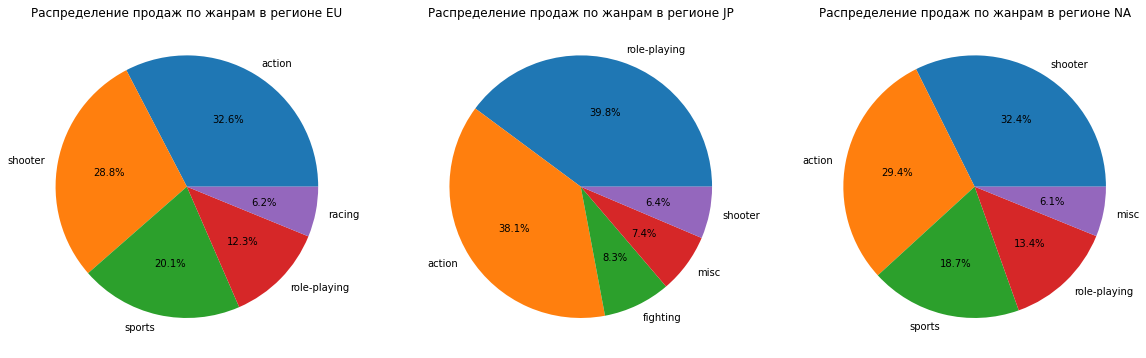

In [63]:
# Строим диаграммы соотношения топ-5 жанров для пользователей по регионам
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
for region in regions:
    top_genres = top_genre_in_region[region].sort_values(ascending=False).head(5)
    axs[regions.index(region)].pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
    axs[regions.index(region)].set_title(f'Распределение продаж по жанрам в регионе {region}')
plt.show()


Доли продаж для каждого жанра также различаются в зависимости от региона. Например, RPG гораздо более популярны в Японии, чем в Северной Америке или Европе, где они занимают четвертое место. Кроме того, жанры Action, Shooter, Sports и RPG имеют приблизительно одинаковое распределение в Северной Америке и  Европе. Это может быть вызвано различными предпочтениями игроков в разных регионах, а также доступностью и популярностью определенных жанров в этих регионах.

### Влияние  рейтинга ESRB на продажи в отдельном регионе

In [64]:
# Группируем данные по суммарным продажам игр для каждого рейтинга ESRB в регионах NA, EU и JP
ESRB_in_region = (data_filtered
                       .pivot_table(index='rating', values={'na_sales', 'eu_sales', 'jp_sales'}, aggfunc='sum')
                       .rename(columns={'na_sales' : 'NA', 'eu_sales' : 'EU', 'jp_sales' : 'JP'})
                      )

In [65]:
ESRB_in_region

,EU,JP,NA
rating,,,
e,57.79,8.86,50.14
e10+,26.03,4.11,32.67
m,93.27,7.78,96.07
t,33.80,14.29,38.24
unrated,58.51,56.66,64.31


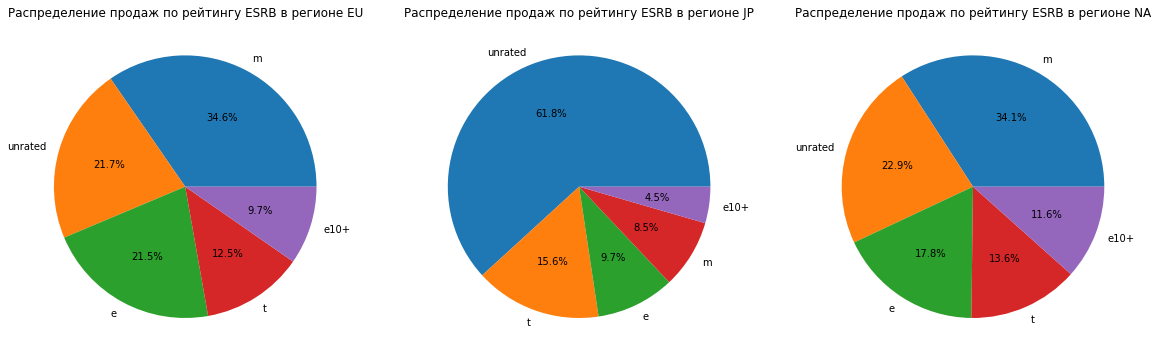

In [66]:
# Строим диаграммы соотношения рейтинга ESRB для пользователей по регионам
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
for region in regions:
    ESRB = ESRB_in_region[region].sort_values(ascending=False).head(5)
    axs[regions.index(region)].pie(ESRB, labels=ESRB.index, autopct='%1.1f%%')
    axs[regions.index(region)].set_title(f'Распределение продаж по рейтингу ESRB в регионе {region}')
plt.show()


В регионе NA количество проданных копий для игр с рейтингом m (Зрелые (17+)) составляет 34.1%, в то время как для игр с рейтингом t (подросток) оно составляет 13.6%. Это говорит о том, что игры с более возрастным рейтингом, как правило, продаются лучше в регионе NA.

Похожая ситуация наблюдается в регионе EU.

В регионе JP среднее количество проданных копий для игр с рейтингом t (Подростки) составляет 15.6%, в то время как для игр с рейтингом m (Зрелые (17+)) оно составляет 8.5%. Это говорит о том, что в регионе JP игры с более низковозрастным рейтингом, как правило, продаются лучше.

Таким образом, рейтинг ESRB может влиять на продажи в отдельном регионе, но это влияние может различаться в зависимости от региона.

**Вывод по разделу:**

**Портрет пользователя для региона EU:**

 - платформа 'ps4'
 - жанр 'action'
 - рейтинг 'm'
 
**Портрет пользователя для региона JP:**
 - платформа '3ds'
 - жанр 'RPG'
 - рейтинг 't'
 
**Портрет пользователя для региона NA:**
 - платформа 'ps4'
 - жанр 'shooter'
 - рейтинг 'm'

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: средние пользовательские рейтинги платформ Xbox One и PC равны

H1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [67]:
# Фильтруем данные для платформ Xbox One и PC
xone = data_filtered.loc[data_filtered['platform'] == 'xone', 'user_score']
pc = data_filtered.loc[data_filtered['platform'] == 'pc', 'user_score'] 

In [68]:
# Задаем уровень статистической значимости
alpha = 0.05 

In [69]:
# Проводим t-тест Стьюдента для двух независимых выборок
results = st.ttest_ind(xone, pc)

In [70]:
'p-значение:', results.pvalue

('p-значение:', 0.07083080462371748)

In [71]:
# Принимаем решение о гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних рейтингов')
else:
    print('Не отвергаем нулевую гипотезу о равенстве средних рейтингов')

Не отвергаем нулевую гипотезу о равенстве средних рейтингов


Для проверки гипотез был применен t-тест Стьюдента для двух независимых выборок. Этот критерий был выбран потому, что мы сравниваем средние значения двух независимых выборок (пользовательские рейтинги для xone и pc), и эти выборки, вероятно, имеют нормальное распределение.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [72]:
# Фильтруем данные для жанров action и sports
action = data_filtered.loc[data_filtered['genre'] == 'action', 'user_score']
sports = data_filtered.loc[data_filtered['genre'] == 'sports', 'user_score']

In [73]:
# Задаем уровень статистической значимости
alpha = 0.05

In [74]:
# Проводим t-тест Стьюдента для двух независимых выборок
results = st.ttest_ind(action, sports)

In [75]:
'p-значение:', results.pvalue

('p-значение:', 0.00039703920505529503)

In [76]:
# Принимаем решение о гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних рейтингов')
else:
    print('Не отвергаем нулевую гипотезу о равенстве средних рейтингов')

Отвергаем нулевую гипотезу о равенстве средних рейтингов


Для проверки гипотез применяется t-тест Стьюдента для двух независимых выборок, так как выборки по рейтингам жанров являются независимыми и размер выборок достаточно велик (более 30 наблюдений в каждой выборке).

## Общий вывод

1. Был проведен анализ содержащих сведения о продажах игр, оценки пользователей и экспертов, жанры и платформы. С имеющимся в распоряжении датафреймом была проведена предобработка данных, были обработаны пропуски, преобразованы типы данных, удалены дубликаты.

2. Был проведен исследовательский анализ данных в результате которого было обнаружено следующее:

 - Активный выпуск игр начался в 90-х, к 2010 -му году достиг своего пика, далее пошел на спад и в последние 5 лет стабилизировался.
 - Наибольшее число проданных копий игр за все время было осуществлено для платформ ps2, x360, ps3, wii, ds и ps. Продажи по этим платформам более чем в два раза отличаются от остальных платформ.
 - За последние 5 лет лидерами продаж являются две платфоры ps4 и xone. Общий тренд для всех платформ по суммарным продажам идет на спад от года к году.
 - Отзывы критиков и пользователей влияют на продажи игр на разных платформах, но степень влияния различается.
 - Жанр action является самым прибыльным, а жанры puzzle и platform - наименее прибыльными.
 
3. Составлены портреты пользователей по регионам:

    Портрет пользователя для региона EU:

 - платформа 'ps4'
 - жанр 'action'
 - рейтинг 'm'

    Портрет пользователя для региона JP:

 - платформа '3ds'
 - жанр 'RPG'
 - рейтинг 't'
    
    Портрет пользователя для региона NA:
 
 - платформа 'ps4'
 - жанр 'shooter'
 - рейтинг 'm'



4. Были произведены проверки гипотез и выявлено следующее:

- разница между средними рейтингами игр на платформах xone и pc не является статистически значимой.
- есть статистически значимые доказательства того, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Прогноз на 2017 год**

В прогнозе продаж игр на 2017 год необходимо учесть особенности рынка в различных регионах. Из анализа данных следует, что наиболее прибыльными платформами для игр являются PS4 и XOne, однако для японского рынка рекомендуется сделать упор на платформе 3DS.

В выборе жанров игр необходимо учитывать предпочтения аудитории в различных регионах. Для регионов Европы и Северной Америки наиболее прибыльными жанрами являются action, shooter и sports, в то время как для японского рынка наиболее востребованными жанрами являются RPG, action и fighting.

Кроме того, стоит обратить внимание на рейтинг игр согласно системе ESRB. Для регионов Европы и Северной Америки более предпочтительными играми являются игры, рассчитанные на взрослую аудиторию, в то время как для японского рынка более популярными являются игры с рейтингом для подростков.

Отзывы пользователей и критиков не всегда коррелируют с продажами игр, поэтому в выборе игр не стоит полагаться исключительно на них.